Description of Notebook: Data Cleaning in Python <br>
Dataset: Hospital Patient Records <br>
Source of Dataset: Maven Analytics <br>
Authors: Sriram Srinivasan, Mitaali Dayal, Dibyanshi Singh <br>

Objective: To process, analyze, and clean our datasets required for analyzing hospital patient records in various hospitals from synthetic data collected from 2011 to 2022, throughout the state of Massachusetts. The final "cleaned" results will then be used for loading the data into Power BI, where we hope to make a dashboard showing the insights gained. <br>

Brief Description of Datasets: <br>
*   Encounters file consists of the purpose of each patient's visit to the hospital (e.g., in-patient, routine exam, outpatient, surgery, etc.)
*   Patients file consists of patient biographic data, including names, addresses, martial status, ethnicity, etc.
*   Procedures file consists of every procedure that a hospital can provide (e.g., MRI, depression screening, physical exams, etc.)
*   Organizations file consists of one row of data mentioning the main hospital in Boston MA -> no analysis needs to be done for this file.
*   Payers file consists of major health insurance providers in the US. -> no analysis needs to be done for this file.

There is a data dictionary accompanying the dataset.

Recommended Analysis to perform:
1. How many patients have been admitted or readmitted over time? <br>
2. How long are patients staying in the hospital, on average? <br>
3. How much is the average cost per visit? <br>
4. How many procedures are covered by insurance? <br>

In [ ]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from datetime import datetime

In [ ]:
# Upload our CSV files
uploaded = files.upload()

Saving encounters.csv to encounters (1).csv
Saving HPR Changelog.xlsx to HPR Changelog (1).xlsx
Saving organizations.csv to organizations (1).csv
Saving patients.csv to patients (1).csv
Saving payers.csv to payers (1).csv
Saving procedures.csv to procedures (1).csv


# Patients File Analysis

In [ ]:
# Read in the patients CSV file
patients = pd.read_csv('patients.csv')

In [ ]:
# Print the head of the patients dataframe
patients.head(50)

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita578,Erdman779,NaN,Leannon79,M,white,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,2186.0,42.290937,-70.975503
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,Mr.,Zane918,Hodkiewicz467,NaN,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162
2,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NaN,Mr.,Quinn173,Marquardt819,NaN,NaN,M,white,nonhispanic,M,Gardner Massachusetts US,816 Okuneva Extension Apt 91,Quincy,Massachusetts,Norfolk County,2170.0,42.265177,-70.967085
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Mr.,Abel832,Smitham825,NaN,NaN,M,white,hispanic,M,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,2118.0,42.334304,-71.066801
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Mr.,Edwin773,Labadie908,NaN,NaN,M,white,hispanic,M,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,2125.0,42.346771,-71.058813
5,8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NaN,Mr.,Frankie174,Oberbrunner298,NaN,NaN,M,white,hispanic,M,Boston Massachusetts US,303 Bechtelar Bypass Suite 26,Boston,Massachusetts,Suffolk County,2467.0,42.371026,-71.118107
6,183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NaN,Mrs.,Eilene124,Walsh511,NaN,Wiegand701,M,asian,nonhispanic,F,Beijing Beijing Municipality CN,235 Lang Parade,Cambridge,Massachusetts,Middlesex County,2142.0,42.358928,-71.156224
7,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NaN,Mr.,Lowell343,Price929,NaN,NaN,M,white,nonhispanic,M,Lowell Massachusetts US,694 Kuhlman Corner Apt 74,Quincy,Massachusetts,Norfolk County,2170.0,42.297904,-71.015983
8,217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NaN,Mr.,Adrian111,Gleason633,NaN,NaN,S,black,hispanic,M,Boston Massachusetts US,808 Gottlieb Wall,Boston,Massachusetts,Suffolk County,2126.0,42.384084,-71.100689
9,ff331e5c-ab16-e218-f39a-63e11de1ed75,1927-07-10,NaN,Mr.,Eugene421,Abernathy524,NaN,NaN,M,native,hispanic,M,Pembroke Massachusetts US,706 Connelly Track Unit 1,Boston,Massachusetts,Suffolk County,2111.0,42.358519,-71.078598


In [ ]:
# Print the tail of the patients dataframe
patients.tail(50)

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,SUFFIX,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
924,57cca2cf-0a10-eca8-22ce-d924796b1b42,1942-07-27,NaN,Mr.,Florencio463,Anderson154,NaN,NaN,M,native,nonhispanic,M,Groveland Massachusetts US,612 Rempel Branch Apt 91,Boston,Massachusetts,Suffolk County,2152.0,42.371477,-71.048132
925,16ebad97-3986-cd97-44fe-36515ab6ad45,1933-08-24,NaN,Mr.,Vincenzo126,Raynor401,NaN,NaN,M,black,nonhispanic,M,Acton Massachusetts US,423 Stark Stravenue,Boston,Massachusetts,Suffolk County,2124.0,42.315068,-71.020325
926,e628d813-fe39-4da4-e93b-ea406a130e54,1978-01-04,NaN,Mr.,Julio255,Pollich983,NaN,NaN,M,white,nonhispanic,M,Milton Massachusetts US,513 Satterfield Landing,Brookline,Massachusetts,Norfolk County,2467.0,42.327325,-71.148248
927,e918253f-e8ca-404c-0419-0ba03a6cd669,1986-01-02,NaN,Mrs.,Classie132,Hilll811,NaN,Kunze215,M,white,nonhispanic,F,Watertown Massachusetts US,605 Kulas Tunnel Unit 97,Brookline,Massachusetts,Norfolk County,2467.0,42.346631,-71.068242
928,229ce85d-1487-38af-738f-2efb401334c0,1933-10-28,NaN,Mrs.,Lurline371,Turcotte120,NaN,Oberbrunner298,M,white,nonhispanic,F,Pembroke Massachusetts US,877 Schultz Parade Apt 74,Revere,Massachusetts,Suffolk County,NaN,42.385425,-71.005103
929,33f31a4c-e818-d9cf-8ea8-7c0430884a9d,1963-08-15,NaN,Mr.,Mario764,Vela532,NaN,NaN,M,white,hispanic,M,Caguas Puerto Rico PR,460 Goodwin Pathway,Boston,Massachusetts,Suffolk County,2124.0,42.346697,-70.995332
930,4247a05f-9fde-02c7-8fb8-97caeac6ec4b,1929-01-06,NaN,Ms.,Dorthy94,Ward668,NaN,NaN,S,white,nonhispanic,F,Peabody Massachusetts US,317 Kertzmann Vista Unit 3,Cambridge,Massachusetts,Middlesex County,2141.0,42.339849,-71.118694
931,624e6dad-69f7-1f89-ca0b-5f77d4415ada,1931-04-10,2016-12-30,Mr.,Weldon459,Nolan344,NaN,NaN,M,white,nonhispanic,M,Bourne Massachusetts US,608 Mohr Esplanade,Boston,Massachusetts,Suffolk County,2132.0,42.324901,-71.068004
932,a24c03cc-0760-bdaa-659b-ec1f5c3bf614,1954-07-17,NaN,Mrs.,Lashawna733,Walter473,NaN,Emard19,M,white,hispanic,F,Auburn Massachusetts US,375 Barrows Promenade,Weymouth,Massachusetts,Norfolk County,NaN,42.229237,-70.919776
933,70e8be4c-7141-66e7-689b-107d851496fb,1945-11-12,NaN,Ms.,Sung603,Legros616,NaN,NaN,S,native,nonhispanic,F,Acushnet Massachusetts US,716 Barton Ferry,Boston,Massachusetts,Suffolk County,2125.0,42.337514,-71.062286


In [ ]:
# Printing some basic statistics to get a high-level overview of the patients dataframe

# By default, describe() includes numeric columns, but since I want all column types (categorical, boolean, etc),
# I have mentioned the 'include=all' argument
patients_stats = patients.describe(include='all')

# Print the summary statistics
print(patients_stats)

                                          Id   BIRTHDATE   DEATHDATE PREFIX  \
count                                    974         974         154    974   
unique                                   974         880         148      3   
top     5605b66b-e92d-c16c-1b83-b8bf7040d51f  1925-11-17  2017-09-29    Mr.   
freq                                       1           4           2    494   
mean                                     NaN         NaN         NaN    NaN   
std                                      NaN         NaN         NaN    NaN   
min                                      NaN         NaN         NaN    NaN   
25%                                      NaN         NaN         NaN    NaN   
50%                                      NaN         NaN         NaN    NaN   
75%                                      NaN         NaN         NaN    NaN   
max                                      NaN         NaN         NaN    NaN   

             FIRST       LAST SUFFIX    MAIDEN MARI

In [ ]:
# Print the initial summary of the patients dataframe
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          974 non-null    object 
 1   BIRTHDATE   974 non-null    object 
 2   DEATHDATE   154 non-null    object 
 3   PREFIX      974 non-null    object 
 4   FIRST       974 non-null    object 
 5   LAST        974 non-null    object 
 6   SUFFIX      21 non-null     object 
 7   MAIDEN      386 non-null    object 
 8   MARITAL     973 non-null    object 
 9   RACE        974 non-null    object 
 10  ETHNICITY   974 non-null    object 
 11  GENDER      974 non-null    object 
 12  BIRTHPLACE  974 non-null    object 
 13  ADDRESS     974 non-null    object 
 14  CITY        974 non-null    object 
 15  STATE       974 non-null    object 
 16  COUNTY      974 non-null    object 
 17  ZIP         832 non-null    float64
 18  LAT         974 non-null    float64
 19  LON         974 non-null    f

In [ ]:
# Drop the suffix column (21 values are present, not needed for our analysis)
patients = patients.drop('SUFFIX', axis=1)
patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          974 non-null    object 
 1   BIRTHDATE   974 non-null    object 
 2   DEATHDATE   154 non-null    object 
 3   PREFIX      974 non-null    object 
 4   FIRST       974 non-null    object 
 5   LAST        974 non-null    object 
 6   MAIDEN      386 non-null    object 
 7   MARITAL     973 non-null    object 
 8   RACE        974 non-null    object 
 9   ETHNICITY   974 non-null    object 
 10  GENDER      974 non-null    object 
 11  BIRTHPLACE  974 non-null    object 
 12  ADDRESS     974 non-null    object 
 13  CITY        974 non-null    object 
 14  STATE       974 non-null    object 
 15  COUNTY      974 non-null    object 
 16  ZIP         832 non-null    float64
 17  LAT         974 non-null    float64
 18  LON         974 non-null    float64
dtypes: float64(3), object(16)
mem

In [ ]:
# Remove digits from first name, last name, and maiden name columns

# .str.replace('\d+', ''): Applies a string method to replace all digit characters in the 'FIRST' / 'LAST' / 'MAIDEN' columns.
# \d+: This is a regular expression pattern where \d matches any digit (0-9), and + means one or more occurrences. So, this pattern matches one or more digits.
# '': This is the replacement string. In this case, digits are replaced with an empty string (''), effectively removing them.
# regex='True': This is essential as Python needs to know that the replace() method is using the RegEx formula.

patients['FIRST'] = patients['FIRST'].str.replace('\d+', '',regex='True')
patients['LAST'] = patients['LAST'].str.replace('\d+', '',regex='True')
patients['MAIDEN'] = patients['MAIDEN'].str.replace('\d+', '',regex='True')

In [ ]:
# Now, remove leading and trailing whitespaces from the 'FIRST', 'LAST', and 'MAIDEN' columns
patients['FIRST'] = patients['FIRST'].str.strip()
patients['LAST'] = patients['LAST'].str.strip()
patients['MAIDEN'] = patients['MAIDEN'].str.strip()

In [ ]:
# We're not done yet, as there is still some weird characters in the name column,
# so let's remove non-ASCII characters from the 'FIRST' / 'LAST' / 'MAIDEN' column

# r'[^\x00-\x7F]+': This regular expression matches any character that is not within the ASCII range (\x00 to \x7F corresponds to ASCII characters).
# The + ensures that one or more non-ASCII characters are replaced.
# '': This replaces any non-ASCII characters with an empty string.

patients['FIRST'] = patients['FIRST'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
patients['LAST'] = patients['LAST'].str.replace(r'[^\x00-\x7F]+', '', regex=True)
patients['MAIDEN'] = patients['MAIDEN'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [ ]:
# Print updated head of patients dataframe after making changes with the naming format
patients.head(50)

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita,Erdman,Leannon,M,white,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,2186.0,42.290937,-70.975503
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,Mr.,Zane,Hodkiewicz,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,2135.0,42.308831,-71.063162
2,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NaN,Mr.,Quinn,Marquardt,NaN,M,white,nonhispanic,M,Gardner Massachusetts US,816 Okuneva Extension Apt 91,Quincy,Massachusetts,Norfolk County,2170.0,42.265177,-70.967085
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Mr.,Abel,Smitham,NaN,M,white,hispanic,M,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,2118.0,42.334304,-71.066801
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Mr.,Edwin,Labadie,NaN,M,white,hispanic,M,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,2125.0,42.346771,-71.058813
5,8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NaN,Mr.,Frankie,Oberbrunner,NaN,M,white,hispanic,M,Boston Massachusetts US,303 Bechtelar Bypass Suite 26,Boston,Massachusetts,Suffolk County,2467.0,42.371026,-71.118107
6,183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NaN,Mrs.,Eilene,Walsh,Wiegand,M,asian,nonhispanic,F,Beijing Beijing Municipality CN,235 Lang Parade,Cambridge,Massachusetts,Middlesex County,2142.0,42.358928,-71.156224
7,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NaN,Mr.,Lowell,Price,NaN,M,white,nonhispanic,M,Lowell Massachusetts US,694 Kuhlman Corner Apt 74,Quincy,Massachusetts,Norfolk County,2170.0,42.297904,-71.015983
8,217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NaN,Mr.,Adrian,Gleason,NaN,S,black,hispanic,M,Boston Massachusetts US,808 Gottlieb Wall,Boston,Massachusetts,Suffolk County,2126.0,42.384084,-71.100689
9,ff331e5c-ab16-e218-f39a-63e11de1ed75,1927-07-10,NaN,Mr.,Eugene,Abernathy,NaN,M,native,hispanic,M,Pembroke Massachusetts US,706 Connelly Track Unit 1,Boston,Massachusetts,Suffolk County,2111.0,42.358519,-71.078598


In [ ]:
# Now, zipcode column originally only has 4 digits, whereas US zipcodes typically have 5 digits.

'''
Explaining more about the .apply(lambda x: ...) function:
.apply() is a pandas function used to apply a function to each element of the ZIP column.
lambda x: ... defines an inline anonymous function. The x represents each element in the ZIP column that the function will process.

If x is not NaN: Convert x to an integer, then to a string, and finally pad it with leading zeros to make it 5 digits long.
If x is NaN: Simply return NaN (i.e., do nothing to that value).
'''

# If a value is present in the ZIP column, convert the float value to an int, then to a string,
# and then make it 5 digit long and apply zeros where necessary.
# Else, leave it as a null value.
patients['ZIP'] = patients['ZIP'].apply(lambda x: str(int(x)).zfill(5) if pd.notnull(x) else np.nan)

In [ ]:
# Print the updated head of patients dataframe after making changes to the zipcode.
patients.head(50)

,Id,BIRTHDATE,DEATHDATE,PREFIX,FIRST,LAST,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaN,Mrs.,Nikita,Erdman,Leannon,M,white,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,02186,42.290937,-70.975503
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaN,Mr.,Zane,Hodkiewicz,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,02135,42.308831,-71.063162
2,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NaN,Mr.,Quinn,Marquardt,NaN,M,white,nonhispanic,M,Gardner Massachusetts US,816 Okuneva Extension Apt 91,Quincy,Massachusetts,Norfolk County,02170,42.265177,-70.967085
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,Mr.,Abel,Smitham,NaN,M,white,hispanic,M,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,02118,42.334304,-71.066801
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,Mr.,Edwin,Labadie,NaN,M,white,hispanic,M,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,02125,42.346771,-71.058813
5,8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NaN,Mr.,Frankie,Oberbrunner,NaN,M,white,hispanic,M,Boston Massachusetts US,303 Bechtelar Bypass Suite 26,Boston,Massachusetts,Suffolk County,02467,42.371026,-71.118107
6,183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NaN,Mrs.,Eilene,Walsh,Wiegand,M,asian,nonhispanic,F,Beijing Beijing Municipality CN,235 Lang Parade,Cambridge,Massachusetts,Middlesex County,02142,42.358928,-71.156224
7,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NaN,Mr.,Lowell,Price,NaN,M,white,nonhispanic,M,Lowell Massachusetts US,694 Kuhlman Corner Apt 74,Quincy,Massachusetts,Norfolk County,02170,42.297904,-71.015983
8,217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NaN,Mr.,Adrian,Gleason,NaN,S,black,hispanic,M,Boston Massachusetts US,808 Gottlieb Wall,Boston,Massachusetts,Suffolk County,02126,42.384084,-71.100689
9,ff331e5c-ab16-e218-f39a-63e11de1ed75,1927-07-10,NaN,Mr.,Eugene,Abernathy,NaN,M,native,hispanic,M,Pembroke Massachusetts US,706 Connelly Track Unit 1,Boston,Massachusetts,Suffolk County,02111,42.358519,-71.078598


In [ ]:
# Now, let's augment the dataset.
# Since there is a Birth date and Death date columns, let's create a calculated age column

# Before that, let's convert those columns to date-time objects
# Convert the BirthDate and DeathDate columns to datetime
patients['BIRTHDATE'] = pd.to_datetime(patients['BIRTHDATE'])
patients['DEATHDATE'] = pd.to_datetime(patients['DEATHDATE'], errors='coerce')  # Coerce invalid dates to NaT

# Function to calculate age
def calculate_age(row):
    if pd.notnull(row['DEATHDATE']):
        # Calculate age at death
        return (row['DEATHDATE'] - row['BIRTHDATE']).days // 365
    else:
        # Calculate age as of today
        return (datetime.now() - row['BIRTHDATE']).days // 365

# Apply the function to create a new Age column
patients['AGE'] = patients.apply(calculate_age, axis=1)

# Insert the Age column immediately after the death date column
deathdate_index = patients.columns.get_loc('DEATHDATE')  # Get the index of the DEATHDATE column
patients.insert(deathdate_index + 1, 'AGE', patients.pop('AGE'))  # Move the Age column next to DEATHDATE

In [ ]:
# Print updated head of patients dataframe after calculating age
patients.head(50)

,Id,BIRTHDATE,DEATHDATE,AGE,PREFIX,FIRST,LAST,MAIDEN,MARITAL,RACE,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaT,47,Mrs.,Nikita,Erdman,Leannon,M,white,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,02186,42.290937,-70.975503
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaT,84,Mr.,Zane,Hodkiewicz,NaN,M,white,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,02135,42.308831,-71.063162
2,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NaT,66,Mr.,Quinn,Marquardt,NaN,M,white,nonhispanic,M,Gardner Massachusetts US,816 Okuneva Extension Apt 91,Quincy,Massachusetts,Norfolk County,02170,42.265177,-70.967085
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,88,Mr.,Abel,Smitham,NaN,M,white,hispanic,M,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,02118,42.334304,-71.066801
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,85,Mr.,Edwin,Labadie,NaN,M,white,hispanic,M,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,02125,42.346771,-71.058813
5,8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NaT,96,Mr.,Frankie,Oberbrunner,NaN,M,white,hispanic,M,Boston Massachusetts US,303 Bechtelar Bypass Suite 26,Boston,Massachusetts,Suffolk County,02467,42.371026,-71.118107
6,183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NaT,67,Mrs.,Eilene,Walsh,Wiegand,M,asian,nonhispanic,F,Beijing Beijing Municipality CN,235 Lang Parade,Cambridge,Massachusetts,Middlesex County,02142,42.358928,-71.156224
7,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NaT,52,Mr.,Lowell,Price,NaN,M,white,nonhispanic,M,Lowell Massachusetts US,694 Kuhlman Corner Apt 74,Quincy,Massachusetts,Norfolk County,02170,42.297904,-71.015983
8,217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NaT,70,Mr.,Adrian,Gleason,NaN,S,black,hispanic,M,Boston Massachusetts US,808 Gottlieb Wall,Boston,Massachusetts,Suffolk County,02126,42.384084,-71.100689
9,ff331e5c-ab16-e218-f39a-63e11de1ed75,1927-07-10,NaT,97,Mr.,Eugene,Abernathy,NaN,M,native,hispanic,M,Pembroke Massachusetts US,706 Connelly Track Unit 1,Boston,Massachusetts,Suffolk County,02111,42.358519,-71.078598


In [ ]:
# Since there is a First Name, Last Name, and Maiden columns, let's concatenate them and create a Full Name column

# Create the 'FullName' column by concatenating 'FIRST', 'MAIDEN' (if exists), and 'LAST'
patients['FULLNAME'] = patients['FIRST'] + ' ' + patients['MAIDEN'].fillna('') + ' ' + patients['LAST']

# Clean up extra spaces in case MAIDEN is empty
patients['FULLNAME'] = patients['FULLNAME'].str.strip().replace(' +', ' ', regex=True)

# Insert the Full Name column immediately after the 'MAIDEN' column
maiden_index = patients.columns.get_loc('MAIDEN')  # Get the index of the 'MAIDEN' column
patients.insert(maiden_index + 1, 'FULLNAME', patients.pop('FULLNAME'))  # Shift the index of the Full Name column by 1

In [ ]:
# Print updated head of patients dataframe after creating full name column
patients.head(50)

,Id,BIRTHDATE,DEATHDATE,AGE,PREFIX,FIRST,LAST,MAIDEN,FULLNAME,MARITAL,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,5605b66b-e92d-c16c-1b83-b8bf7040d51f,1977-03-19,NaT,47,Mrs.,Nikita,Erdman,Leannon,Nikita Leannon Erdman,M,...,nonhispanic,F,Wakefield Massachusetts US,510 Little Station Unit 69,Quincy,Massachusetts,Norfolk County,02186,42.290937,-70.975503
1,6e5ae27c-8038-7988-e2c0-25a103f01bfa,1940-02-19,NaT,84,Mr.,Zane,Hodkiewicz,NaN,Zane Hodkiewicz,M,...,nonhispanic,M,Brookline Massachusetts US,747 Conn Throughway,Boston,Massachusetts,Suffolk County,02135,42.308831,-71.063162
2,8123d076-0886-9007-e956-d5864aa121a7,1958-06-04,NaT,66,Mr.,Quinn,Marquardt,NaN,Quinn Marquardt,M,...,nonhispanic,M,Gardner Massachusetts US,816 Okuneva Extension Apt 91,Quincy,Massachusetts,Norfolk County,02170,42.265177,-70.967085
3,770518e4-6133-648e-60c9-071eb2f0e2ce,1928-12-25,2017-09-29,88,Mr.,Abel,Smitham,NaN,Abel Smitham,M,...,hispanic,M,Randolph Massachusetts US,127 Cole Way Unit 95,Boston,Massachusetts,Suffolk County,02118,42.334304,-71.066801
4,f96addf5-81b9-0aab-7855-d208d3d352c5,1928-12-25,2014-02-23,85,Mr.,Edwin,Labadie,NaN,Edwin Labadie,M,...,hispanic,M,Stow Massachusetts US,976 Ziemann Gateway,Boston,Massachusetts,Suffolk County,02125,42.346771,-71.058813
5,8e9650d1-788a-78f9-4a28-d08f7f95354a,1928-12-25,NaT,96,Mr.,Frankie,Oberbrunner,NaN,Frankie Oberbrunner,M,...,hispanic,M,Boston Massachusetts US,303 Bechtelar Bypass Suite 26,Boston,Massachusetts,Suffolk County,02467,42.371026,-71.118107
6,183df435-4190-060e-8f8e-bf63c572b266,1957-11-08,NaT,67,Mrs.,Eilene,Walsh,Wiegand,Eilene Wiegand Walsh,M,...,nonhispanic,F,Beijing Beijing Municipality CN,235 Lang Parade,Cambridge,Massachusetts,Middlesex County,02142,42.358928,-71.156224
7,720560d4-51da-c38c-ee90-c15935278df1,1972-06-27,NaT,52,Mr.,Lowell,Price,NaN,Lowell Price,M,...,nonhispanic,M,Lowell Massachusetts US,694 Kuhlman Corner Apt 74,Quincy,Massachusetts,Norfolk County,02170,42.297904,-71.015983
8,217851b0-5f47-d376-18b9-0fe4ba77207e,1954-03-06,NaT,70,Mr.,Adrian,Gleason,NaN,Adrian Gleason,S,...,hispanic,M,Boston Massachusetts US,808 Gottlieb Wall,Boston,Massachusetts,Suffolk County,02126,42.384084,-71.100689
9,ff331e5c-ab16-e218-f39a-63e11de1ed75,1927-07-10,NaT,97,Mr.,Eugene,Abernathy,NaN,Eugene Abernathy,M,...,hispanic,M,Pembroke Massachusetts US,706 Connelly Track Unit 1,Boston,Massachusetts,Suffolk County,02111,42.358519,-71.078598


In [ ]:
# Convert the cleaned Patients dataframe into a downloadable Excel file format
patients.to_csv("patients_cleaned.csv", index=False)

# Procedures File Analysis

In [ ]:
# Read in the procedures CSV file
procedures = pd.read_csv('procedures.csv')

In [ ]:
# Print the head of the procedures dataframe
procedures.head(50)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009,Renal dialysis (procedure),903,NaN,NaN
1,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001,Intramuscular injection,2477,NaN,NaN
2,2011-01-04T14:49:55Z,2011-01-04T15:04:55Z,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002,Combined chemotherapy and radiation therapy (p...,11620,3.634060e+08,Malignant tumor of colon
3,2011-01-05T04:02:09Z,2011-01-05T04:17:09Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006,Diagnostic fiberoptic bronchoscopy (procedure),9796,1.625730e+08,Suspected lung cancer (situation)
4,2011-01-05T12:58:36Z,2011-01-05T16:42:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009,Renal dialysis (procedure),1255,NaN,NaN
5,2011-01-06T18:12:41Z,2011-01-06T18:17:12Z,712e95dd-f313-39c7-1fc9-8463c15c105f,44057ea7-178f-c3c3-965a-78e4521fa43b,410006001,Digital examination of rectum,564,NaN,NaN
6,2011-01-07T21:02:09Z,2011-01-07T22:39:45Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,4b6a38e6-7df9-2d75-d850-6bd662f3d05b,698354004,Magnetic resonance imaging for measurement of ...,5050,4.241320e+08,Non-small cell carcinoma of lung TNM stage 1 ...
7,2011-01-07T22:39:45Z,2011-01-07T23:00:45Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,cc36dc26-6019-94a5-93b7-7bbf312e6fc4,703423002,Combined chemotherapy and radiation therapy (p...,15760,4.241320e+08,Non-small cell carcinoma of lung TNM stage 1 ...
8,2011-01-08T16:42:36Z,2011-01-08T20:15:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,03f54837-bfc8-81aa-4905-f74ceb35162f,265764009,Renal dialysis (procedure),1556,NaN,NaN
9,2011-01-09T16:11:28Z,2011-01-09T16:51:19Z,f4cde0dc-db22-5d98-5228-55121ae74cad,17d162fa-fc25-b3c5-5e72-20287a55eaf1,73761001,Colonoscopy,13620,NaN,NaN


In [ ]:
# Print the tail of the procedures dataframe
procedures.tail(50)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
47651,2022-01-21T08:42:07Z,2022-01-21T10:43:07Z,9b8ae606-5059-b3a6-19c7-c812901898bb,b671d9e3-4398-a83f-90e8-16c08399dd22,265764009,Renal dialysis (procedure),1134,NaN,NaN
47652,2022-01-21T21:34:23Z,2022-01-21T21:49:23Z,c6e38dde-3d7b-da88-92f8-8e98bf4d58ca,aa5670fa-e4df-8bef-dadb-bd593f92b104,399014008,Vaccination for diphtheria pertussis and tet...,3167,72892002.0,Normal pregnancy
47653,2022-01-21T21:34:23Z,2022-01-21T21:49:23Z,c6e38dde-3d7b-da88-92f8-8e98bf4d58ca,aa5670fa-e4df-8bef-dadb-bd593f92b104,274804006,Evaluation of uterine fundal height,8492,72892002.0,Normal pregnancy
47654,2022-01-21T21:34:23Z,2022-01-21T21:49:23Z,c6e38dde-3d7b-da88-92f8-8e98bf4d58ca,aa5670fa-e4df-8bef-dadb-bd593f92b104,268556000,Urine screening for glucose,1619,72892002.0,Normal pregnancy
47655,2022-01-21T21:34:23Z,2022-01-21T21:49:23Z,c6e38dde-3d7b-da88-92f8-8e98bf4d58ca,aa5670fa-e4df-8bef-dadb-bd593f92b104,225158009,Auscultation of the fetal heart,7045,72892002.0,Normal pregnancy
47656,2022-01-21T21:34:23Z,2022-01-21T21:49:23Z,c6e38dde-3d7b-da88-92f8-8e98bf4d58ca,aa5670fa-e4df-8bef-dadb-bd593f92b104,104091002,Hemoglobin / Hematocrit / Platelet count,2316,72892002.0,Normal pregnancy
47657,2022-01-22T13:06:36Z,2022-01-22T16:10:36Z,b17ffd11-c8c2-28aa-0c26-8ddc6bc5957d,196baa47-5b06-699b-ae26-f0ad2eefbd39,265764009,Renal dialysis (procedure),1044,NaN,NaN
47658,2022-01-22T14:10:02Z,2022-01-22T17:21:02Z,5e055638-0dad-dfd5-005d-1e74b6fd29ac,c4ca216f-7f9b-0e30-9345-d9ecdfb69f12,265764009,Renal dialysis (procedure),1319,NaN,NaN
47659,2022-01-22T18:12:33Z,2022-01-22T18:27:33Z,b190fd1c-295d-b2de-7844-f1836f081dc0,a5a5909d-b340-e48b-f5e4-6f7565406d5f,274804006,Evaluation of uterine fundal height,5990,72892002.0,Normal pregnancy
47660,2022-01-22T18:12:33Z,2022-01-22T18:27:33Z,b190fd1c-295d-b2de-7844-f1836f081dc0,a5a5909d-b340-e48b-f5e4-6f7565406d5f,225158009,Auscultation of the fetal heart,5272,72892002.0,Normal pregnancy


In [ ]:
# Printing some basic statistics to get a high-level overview of the procedures dataframe

# By default, describe() includes numeric columns, but since I want all column types (categorical, boolean, etc),
# I have mentioned the 'include=all' argument
procedures_stats = procedures.describe(include='all')

# Print the summary statistics
print(procedures_stats)

                       START                  STOP  \
count                  47701                 47701   
unique                 39251                 42263   
top     2013-09-30T22:31:23Z  2019-03-12T08:27:16Z   
freq                      21                    20   
mean                     NaN                   NaN   
std                      NaN                   NaN   
min                      NaN                   NaN   
25%                      NaN                   NaN   
50%                      NaN                   NaN   
75%                      NaN                   NaN   
max                      NaN                   NaN   

                                     PATIENT  \
count                                  47701   
unique                                   793   
top     1712d26d-822d-1e3a-2267-0a9dba31d7c8   
freq                                    1783   
mean                                     NaN   
std                                      NaN   
min            

In [ ]:
# Print the initial summary of the procedures dataframe
procedures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47701 entries, 0 to 47700
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   START              47701 non-null  object 
 1   STOP               47701 non-null  object 
 2   PATIENT            47701 non-null  object 
 3   ENCOUNTER          47701 non-null  object 
 4   CODE               47701 non-null  int64  
 5   DESCRIPTION        47701 non-null  object 
 6   BASE_COST          47701 non-null  int64  
 7   REASONCODE         10756 non-null  float64
 8   REASONDESCRIPTION  10756 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.3+ MB


In [ ]:
# Replace NaNs from Reason Code column with zeroes
procedures['REASONCODE'] = procedures['REASONCODE'].fillna(0)
# Convert 'REASONCODE' to integer type to remove scientific notation
procedures['REASONCODE'] = procedures['REASONCODE'].astype(int)
# Replace NaNs from Reason Description column with unknowns
procedures['REASONDESCRIPTION'] = procedures['REASONDESCRIPTION'].fillna('Unknown')

In [ ]:
# Print the updated procedures dataframe after filling the NaNs in Reason Code and Reason Descriptipn with their respective values
procedures.head(50)

,START,STOP,PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009,Renal dialysis (procedure),903,0,Unknown
1,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001,Intramuscular injection,2477,0,Unknown
2,2011-01-04T14:49:55Z,2011-01-04T15:04:55Z,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002,Combined chemotherapy and radiation therapy (p...,11620,363406005,Malignant tumor of colon
3,2011-01-05T04:02:09Z,2011-01-05T04:17:09Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006,Diagnostic fiberoptic bronchoscopy (procedure),9796,162573006,Suspected lung cancer (situation)
4,2011-01-05T12:58:36Z,2011-01-05T16:42:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009,Renal dialysis (procedure),1255,0,Unknown
5,2011-01-06T18:12:41Z,2011-01-06T18:17:12Z,712e95dd-f313-39c7-1fc9-8463c15c105f,44057ea7-178f-c3c3-965a-78e4521fa43b,410006001,Digital examination of rectum,564,0,Unknown
6,2011-01-07T21:02:09Z,2011-01-07T22:39:45Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,4b6a38e6-7df9-2d75-d850-6bd662f3d05b,698354004,Magnetic resonance imaging for measurement of ...,5050,424132000,Non-small cell carcinoma of lung TNM stage 1 ...
7,2011-01-07T22:39:45Z,2011-01-07T23:00:45Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,cc36dc26-6019-94a5-93b7-7bbf312e6fc4,703423002,Combined chemotherapy and radiation therapy (p...,15760,424132000,Non-small cell carcinoma of lung TNM stage 1 ...
8,2011-01-08T16:42:36Z,2011-01-08T20:15:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,03f54837-bfc8-81aa-4905-f74ceb35162f,265764009,Renal dialysis (procedure),1556,0,Unknown
9,2011-01-09T16:11:28Z,2011-01-09T16:51:19Z,f4cde0dc-db22-5d98-5228-55121ae74cad,17d162fa-fc25-b3c5-5e72-20287a55eaf1,73761001,Colonoscopy,13620,0,Unknown


In [ ]:
# Now, let's augment the dataset

# Start and Stop columns have some extra information, such as T09:26:36Z, which
# represent the time (09:26:36) in  the ISO 8601 datetime format.

# Let's remove the extra values from those columns
# Convert the 'Start' and 'Stop' columns to datetime type
procedures['START'] = pd.to_datetime(procedures['START'],utc='True')
procedures['STOP'] = pd.to_datetime(procedures['STOP'],utc='True')

# Remove 'DURATION' if it already exists
if 'DURATION (mins)' in procedures.columns:
    procedures.drop(columns=['DURATION (mins)'], inplace=True)

# Calculate the duration
procedures['DURATION (mins)'] = ((procedures['STOP'] - procedures['START']).dt.total_seconds() / 60).astype(int) # Duration in minutes, rounded to nearest whole number

# Insert the 'DURATION' column immediately after 'STOP' column
stop_index = procedures.columns.get_loc('STOP')
procedures.insert(stop_index + 1, 'DURATION (mins)', procedures.pop('DURATION (mins)'))  # Shift the index of 'DURATION' by 1

In [ ]:
# Print the updated head of the procedures dataframe after calculating the duration
procedures.head(50)

,START,STOP,DURATION (mins),PATIENT,ENCOUNTER,CODE,DESCRIPTION,BASE_COST,REASONCODE,REASONDESCRIPTION
0,2011-01-02 09:26:36+00:00,2011-01-02 12:58:36+00:00,212,3de74169-7f67-9304-91d4-757e0f3a14d2,32c84703-2481-49cd-d571-3899d5820253,265764009,Renal dialysis (procedure),903,0,Unknown
1,2011-01-03 05:44:39+00:00,2011-01-03 06:01:42+00:00,17,d9ec2e44-32e9-9148-179a-1653348cc4e2,c98059da-320a-c0a6-fced-c8815f3e3f39,76601001,Intramuscular injection,2477,0,Unknown
2,2011-01-04 14:49:55+00:00,2011-01-04 15:04:55+00:00,15,d856d6e6-4c98-e7a2-129b-44076c63d008,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,703423002,Combined chemotherapy and radiation therapy (p...,11620,363406005,Malignant tumor of colon
3,2011-01-05 04:02:09+00:00,2011-01-05 04:17:09+00:00,15,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,17966936-0878-f4db-128b-a43ae10d0878,173160006,Diagnostic fiberoptic bronchoscopy (procedure),9796,162573006,Suspected lung cancer (situation)
4,2011-01-05 12:58:36+00:00,2011-01-05 16:42:36+00:00,224,3de74169-7f67-9304-91d4-757e0f3a14d2,9de5f0b0-4ba4-ce6f-45fb-b55c202f31a5,265764009,Renal dialysis (procedure),1255,0,Unknown
5,2011-01-06 18:12:41+00:00,2011-01-06 18:17:12+00:00,4,712e95dd-f313-39c7-1fc9-8463c15c105f,44057ea7-178f-c3c3-965a-78e4521fa43b,410006001,Digital examination of rectum,564,0,Unknown
6,2011-01-07 21:02:09+00:00,2011-01-07 22:39:45+00:00,97,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,4b6a38e6-7df9-2d75-d850-6bd662f3d05b,698354004,Magnetic resonance imaging for measurement of ...,5050,424132000,Non-small cell carcinoma of lung TNM stage 1 ...
7,2011-01-07 22:39:45+00:00,2011-01-07 23:00:45+00:00,21,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,cc36dc26-6019-94a5-93b7-7bbf312e6fc4,703423002,Combined chemotherapy and radiation therapy (p...,15760,424132000,Non-small cell carcinoma of lung TNM stage 1 ...
8,2011-01-08 16:42:36+00:00,2011-01-08 20:15:36+00:00,213,3de74169-7f67-9304-91d4-757e0f3a14d2,03f54837-bfc8-81aa-4905-f74ceb35162f,265764009,Renal dialysis (procedure),1556,0,Unknown
9,2011-01-09 16:11:28+00:00,2011-01-09 16:51:19+00:00,39,f4cde0dc-db22-5d98-5228-55121ae74cad,17d162fa-fc25-b3c5-5e72-20287a55eaf1,73761001,Colonoscopy,13620,0,Unknown


In [ ]:
# Convert the cleaned Procedures dataframe into a downloadable Excel file format
procedures.to_csv("procedures_cleaned.csv", index=False)

# Encounters File Analysis

In [ ]:
# Read in the encounters CSV file
encounters = pd.read_csv('encounters.csv')

In [ ]:
# Print the head of the encounters dataframe
encounters.head(50)

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,NaN,NaN
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,NaN,NaN
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,NaN,NaN
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,NaN,NaN
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004.0,Hyperlipidemia
5,c4923a74-3e40-8b0c-cf73-05b9c0390621,2011-01-03T19:08:16Z,2011-01-03T19:23:16Z,823c6b40-9dbe-e463-310b-ea2b23b23b48,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),136.80,1183.25,946.58,NaN,NaN
6,c140ed81-040e-8319-e860-f72b4738ed22,2011-01-03T22:39:50Z,2011-01-03T22:54:50Z,9c616fc0-00ea-249f-d073-1f3bb15d41fa,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,185349003,Encounter for check up (procedure),85.55,6024.77,0.00,NaN,NaN
7,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,2011-01-04T14:49:55Z,2011-01-04T15:04:55Z,d856d6e6-4c98-e7a2-129b-44076c63d008,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185347001,Encounter for problem,85.55,11855.19,11205.43,363406005.0,Malignant tumor of colon
8,16bdc066-886f-34e1-38fa-afb85090b637,2011-01-04T15:13:10Z,2011-01-04T15:28:10Z,a80b1160-93f0-db7e-9f23-04ea6fdddfaf,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,272.80,0.00,NaN,NaN
9,17966936-0878-f4db-128b-a43ae10d0878,2011-01-05T04:02:09Z,2011-01-05T04:17:09Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185347001,Encounter for problem,85.55,9881.17,7872.94,254637007.0,Non-small cell lung cancer (disorder)


In [ ]:
# Print the tail of the encounters dataframe
encounters.tail(50)

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
27841,dfa7cbb8-ce6a-ac7b-7335-11594f39bbf6,2022-01-21T23:43:14Z,2022-01-21T23:58:14Z,50723ad0-36ac-615b-14dc-ca93019aba6b,d78e84ec-30aa-3bba-a33a-f29a3a454662,d47b3510-2895-3b70-9897-342d681c769d,urgentcare,702927004,Urgent care clinic (procedure),142.58,142.58,0.00,NaN,NaN
27842,004fc010-d063-3670-9778-a4e492f16353,2022-01-22T07:12:10Z,2022-01-22T07:27:10Z,7c1c8f58-7e2d-12cd-bcdf-e5bd5b4afebc,d78e84ec-30aa-3bba-a33a-f29a3a454662,b3221cfc-24fb-339e-823d-bc4136cbc4ed,ambulatory,448337001,Telemedicine consultation with patient,142.58,142.58,40.45,88805009.0,Chronic congestive heart failure (disorder)
27843,196baa47-5b06-699b-ae26-f0ad2eefbd39,2022-01-22T13:06:36Z,2022-01-22T16:10:36Z,b17ffd11-c8c2-28aa-0c26-8ddc6bc5957d,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,ambulatory,185347001,Encounter for problem (procedure),85.55,1159.29,871.79,NaN,NaN
27844,10c60c86-b368-2b6c-798f-4bc0a50aa7f5,2022-01-22T13:44:27Z,2022-01-22T13:59:27Z,a96d5031-46d5-e3f6-ec67-81f8edd48aa8,d78e84ec-30aa-3bba-a33a-f29a3a454662,4d71f845-a6a9-3c39-b242-14d25ef86a8d,urgentcare,702927004,Urgent care clinic (procedure),142.58,142.58,0.00,NaN,NaN
27845,c4ca216f-7f9b-0e30-9345-d9ecdfb69f12,2022-01-22T14:10:02Z,2022-01-22T17:21:02Z,5e055638-0dad-dfd5-005d-1e74b6fd29ac,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,ambulatory,185347001,Encounter for problem (procedure),85.55,1434.45,1091.92,NaN,NaN
27846,a5a5909d-b340-e48b-f5e4-6f7565406d5f,2022-01-22T18:12:33Z,2022-01-22T18:27:33Z,b190fd1c-295d-b2de-7844-f1836f081dc0,d78e84ec-30aa-3bba-a33a-f29a3a454662,6e2f1a2d-27bd-3701-8d08-dae202c58632,ambulatory,424619006,Prenatal visit,142.58,11404.27,8496.95,72892002.0,Normal pregnancy
27847,af8485a1-e642-fa80-899b-6578dc0fc6d1,2022-01-22T18:28:39Z,2022-01-22T18:43:39Z,5bd6c434-6f51-6e53-4d0f-8d3889f377da,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,ambulatory,390906007,Follow-up encounter,85.55,234.72,155.77,55822004.0,Hyperlipidemia
27848,cb30ada4-91b8-cced-e855-8ef2dcb563cc,2022-01-22T20:54:19Z,2022-01-22T21:09:19Z,e0f9b98c-f983-cba1-9095-0e48d10f0195,d78e84ec-30aa-3bba-a33a-f29a3a454662,047f6ec3-6215-35eb-9608-f9dda363a44c,ambulatory,185345009,Encounter for symptom,85.55,85.55,0.00,444814009.0,Viral sinusitis (disorder)
27849,f47d4f83-ecd4-b813-4dff-11d8c31fc711,2022-01-22T23:36:18Z,2022-01-22T23:51:18Z,e2d8e1ed-6f63-54e2-d14e-8346799e92ef,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,ambulatory,448337001,Telemedicine consultation with patient,142.58,142.58,82.06,88805009.0,Chronic congestive heart failure (disorder)
27850,893c2ed7-2da8-569e-f7d1-508af21fb3f2,2022-01-23T06:12:15Z,2022-01-23T10:11:15Z,1712d26d-822d-1e3a-2267-0a9dba31d7c8,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,861.46,0.00,NaN,NaN


In [ ]:
# Printing some basic statistics to get a high-level overview of the encounters dataframe

# By default, describe() includes numeric columns, but since I want all column types (categorical, boolean, etc),
# I have mentioned the 'include=all' argument
encounters_stats = encounters.describe(include='all')

# Print the summary statistics
print(encounters_stats)

                                          Id                 START  \
count                                  27891                 27891   
unique                                 27891                 27541   
top     32c84703-2481-49cd-d571-3899d5820253  2016-12-08T10:00:40Z   
freq                                       1                     3   
mean                                     NaN                   NaN   
std                                      NaN                   NaN   
min                                      NaN                   NaN   
25%                                      NaN                   NaN   
50%                                      NaN                   NaN   
75%                                      NaN                   NaN   
max                                      NaN                   NaN   

                        STOP                               PATIENT  \
count                  27891                                 27891   
unique             

In [ ]:
# Print the initial summary of the encounters dataframe
encounters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   27891 non-null  object 
 1   START                27891 non-null  object 
 2   STOP                 27891 non-null  object 
 3   PATIENT              27891 non-null  object 
 4   ORGANIZATION         27891 non-null  object 
 5   PAYER                27891 non-null  object 
 6   ENCOUNTERCLASS       27891 non-null  object 
 7   CODE                 27891 non-null  int64  
 8   DESCRIPTION          27891 non-null  object 
 9   BASE_ENCOUNTER_COST  27891 non-null  float64
 10  TOTAL_CLAIM_COST     27891 non-null  float64
 11  PAYER_COVERAGE       27891 non-null  float64
 12  REASONCODE           8350 non-null   float64
 13  REASONDESCRIPTION    8350 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 3.0+ MB


In [ ]:
# Replace NaNs from Reason Code column with zeroes
encounters['REASONCODE'] = encounters['REASONCODE'].fillna(0)
# Convert 'REASONCODE' to integer type to remove scientific notation
encounters['REASONCODE'] = encounters['REASONCODE'].astype(int)
# Replace NaNs from Reason Description column with unknowns
encounters['REASONDESCRIPTION'] = encounters['REASONDESCRIPTION'].fillna('Unknown')

In [ ]:
# Print the updated encounters dataframe after filling the NaNs in Reason Code and Reason Descriptipn with their respective values
encounters.head(50)

,Id,START,STOP,PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02T09:26:36Z,2011-01-02T12:58:36Z,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,0,Unknown
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03T05:44:39Z,2011-01-03T06:01:42Z,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,0,Unknown
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03T14:32:11Z,2011-01-03T14:47:11Z,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,0,Unknown
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03T16:24:45Z,2011-01-03T16:39:45Z,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,0,Unknown
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03T17:36:53Z,2011-01-03T17:51:53Z,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004,Hyperlipidemia
5,c4923a74-3e40-8b0c-cf73-05b9c0390621,2011-01-03T19:08:16Z,2011-01-03T19:23:16Z,823c6b40-9dbe-e463-310b-ea2b23b23b48,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),136.80,1183.25,946.58,0,Unknown
6,c140ed81-040e-8319-e860-f72b4738ed22,2011-01-03T22:39:50Z,2011-01-03T22:54:50Z,9c616fc0-00ea-249f-d073-1f3bb15d41fa,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,185349003,Encounter for check up (procedure),85.55,6024.77,0.00,0,Unknown
7,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,2011-01-04T14:49:55Z,2011-01-04T15:04:55Z,d856d6e6-4c98-e7a2-129b-44076c63d008,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185347001,Encounter for problem,85.55,11855.19,11205.43,363406005,Malignant tumor of colon
8,16bdc066-886f-34e1-38fa-afb85090b637,2011-01-04T15:13:10Z,2011-01-04T15:28:10Z,a80b1160-93f0-db7e-9f23-04ea6fdddfaf,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,272.80,0.00,0,Unknown
9,17966936-0878-f4db-128b-a43ae10d0878,2011-01-05T04:02:09Z,2011-01-05T04:17:09Z,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185347001,Encounter for problem,85.55,9881.17,7872.94,254637007,Non-small cell lung cancer (disorder)


In [ ]:
# Now, let's augment the dataset

# Start and Stop columns have some extra information, such as T09:26:36Z, which
# represent the time (09:26:36) in  the ISO 8601 datetime format.

# Let's remove the extra values from those columns
# Convert the 'Start' and 'Stop' columns to datetime type
encounters['START'] = pd.to_datetime(encounters['START'],utc='True')
encounters['STOP'] = pd.to_datetime(encounters['STOP'],utc='True')

# Remove 'DURATION' if it already exists
if 'DURATION (mins)' in encounters.columns:
    encounters.drop(columns=['DURATION (mins)'], inplace=True)

# Calculate the duration
encounters['DURATION (mins)'] = ((encounters['STOP'] - encounters['START']).dt.total_seconds() / 60).astype(int) # Duration in minutes, rounded to nearest whole number

# Insert the 'DURATION' column immediately after 'STOP' column
stop_index = encounters.columns.get_loc('STOP')
encounters.insert(stop_index + 1, 'DURATION (mins)', encounters.pop('DURATION (mins)'))  # Shift the index of 'DURATION' by 1

In [ ]:
# Print the updated head of the encounters dataframe after calculating the duration
encounters.head(50)

,Id,START,STOP,DURATION (mins),PATIENT,ORGANIZATION,PAYER,ENCOUNTERCLASS,CODE,DESCRIPTION,BASE_ENCOUNTER_COST,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONCODE,REASONDESCRIPTION
0,32c84703-2481-49cd-d571-3899d5820253,2011-01-02 09:26:36+00:00,2011-01-02 12:58:36+00:00,212,3de74169-7f67-9304-91d4-757e0f3a14d2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,ambulatory,185347001,Encounter for problem (procedure),85.55,1018.02,0.00,0,Unknown
1,c98059da-320a-c0a6-fced-c8815f3e3f39,2011-01-03 05:44:39+00:00,2011-01-03 06:01:42+00:00,17,d9ec2e44-32e9-9148-179a-1653348cc4e2,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,308335008,Patient encounter procedure,142.58,2619.36,0.00,0,Unknown
2,4ad28a3a-2479-782b-f29c-d5b3f41a001e,2011-01-03 14:32:11+00:00,2011-01-03 14:47:11+00:00,15,73babadf-5b2b-fee7-189e-6f41ff213e01,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185349003,Encounter for check up (procedure),85.55,461.59,305.27,0,Unknown
3,c3f4da61-e4b4-21d5-587a-fbc89943bc19,2011-01-03 16:24:45+00:00,2011-01-03 16:39:45+00:00,15,3b46a0b7-0f34-9b9a-c319-ace4a1f58c0b,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,1784.24,0.00,0,Unknown
4,a9183b4f-2572-72ea-54c2-b3cd038b4be7,2011-01-03 17:36:53+00:00,2011-01-03 17:51:53+00:00,15,fa006887-d93c-d302-8b89-f3c25f88c0e1,d78e84ec-30aa-3bba-a33a-f29a3a454662,42c4fca7-f8a9-3cd1-982a-dd9751bf3e2a,ambulatory,390906007,Follow-up encounter,85.55,234.72,0.00,55822004,Hyperlipidemia
5,c4923a74-3e40-8b0c-cf73-05b9c0390621,2011-01-03 19:08:16+00:00,2011-01-03 19:23:16+00:00,15,823c6b40-9dbe-e463-310b-ea2b23b23b48,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,wellness,162673000,General examination of patient (procedure),136.80,1183.25,946.58,0,Unknown
6,c140ed81-040e-8319-e860-f72b4738ed22,2011-01-03 22:39:50+00:00,2011-01-03 22:54:50+00:00,15,9c616fc0-00ea-249f-d073-1f3bb15d41fa,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,outpatient,185349003,Encounter for check up (procedure),85.55,6024.77,0.00,0,Unknown
7,2cfd4ddd-ad13-fe1e-528b-15051cea2ec3,2011-01-04 14:49:55+00:00,2011-01-04 15:04:55+00:00,15,d856d6e6-4c98-e7a2-129b-44076c63d008,d78e84ec-30aa-3bba-a33a-f29a3a454662,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,ambulatory,185347001,Encounter for problem,85.55,11855.19,11205.43,363406005,Malignant tumor of colon
8,16bdc066-886f-34e1-38fa-afb85090b637,2011-01-04 15:13:10+00:00,2011-01-04 15:28:10+00:00,15,a80b1160-93f0-db7e-9f23-04ea6fdddfaf,d78e84ec-30aa-3bba-a33a-f29a3a454662,b1c428d6-4f07-31e0-90f0-68ffa6ff8c76,wellness,162673000,General examination of patient (procedure),136.80,272.80,0.00,0,Unknown
9,17966936-0878-f4db-128b-a43ae10d0878,2011-01-05 04:02:09+00:00,2011-01-05 04:17:09+00:00,15,bc9d59c3-0a30-6e3b-f47d-022e4f03c8de,d78e84ec-30aa-3bba-a33a-f29a3a454662,7caa7254-5050-3b5e-9eae-bd5ea30e809c,outpatient,185347001,Encounter for problem,85.55,9881.17,7872.94,254637007,Non-small cell lung cancer (disorder)


In [ ]:
# Convert the cleaned Encounters dataframe into a downloadable Excel file format
encounters.to_csv("encounters_cleaned.csv", index=False)

# Payers File Analysis

In [ ]:
# No data cleaning necessary for payers file, so we'll just load into a dataframe
# Read in the payers CSV file
payers = pd.read_csv('payers.csv')

In [ ]:
# Read the payers dataframe
payers.head()

,Id,NAME,ADDRESS,CITY,STATE_HEADQUARTERED,ZIP,PHONE
0,b3221cfc-24fb-339e-823d-bc4136cbc4ed,Dual Eligible,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
1,7caa7254-5050-3b5e-9eae-bd5ea30e809c,Medicare,7500 Security Blvd,Baltimore,MD,21244.0,1-800-633-4227
2,7c4411ce-02f1-39b5-b9ec-dfbea9ad3c1a,Medicaid,7500 Security Blvd,Baltimore,MD,21244.0,1-877-267-2323
3,d47b3510-2895-3b70-9897-342d681c769d,Humana,500 West Main St,Louisville,KY,40018.0,1-844-330-7799
4,6e2f1a2d-27bd-3701-8d08-dae202c58632,Blue Cross Blue Shield,Michigan Plaza,Chicago,IL,60007.0,1-800-262-2583


In [ ]:
# Print summary statistics of payers dataframe
payers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10 non-null     object 
 1   NAME                 10 non-null     object 
 2   ADDRESS              9 non-null      object 
 3   CITY                 9 non-null      object 
 4   STATE_HEADQUARTERED  9 non-null      object 
 5   ZIP                  9 non-null      float64
 6   PHONE                9 non-null      object 
dtypes: float64(1), object(6)
memory usage: 688.0+ bytes


# Organizations File Analysis

In [ ]:
# No data cleaning necessary for orgs file, so we'll just load into a dataframe
# Read in the orgs CSV file
organizations = pd.read_csv('organizations.csv')

In [ ]:
# Read the orgs dataframe
organizations.head()

,Id,NAME,ADDRESS,CITY,STATE,ZIP,LAT,LON
0,d78e84ec-30aa-3bba-a33a-f29a3a454662,MASSACHUSETTS GENERAL HOSPITAL,55 FRUIT STREET,BOSTON,MA,2114,42.362813,-71.069187


In [ ]:
# Print summary statistics of orgs dataframe
organizations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       1 non-null      object 
 1   NAME     1 non-null      object 
 2   ADDRESS  1 non-null      object 
 3   CITY     1 non-null      object 
 4   STATE    1 non-null      object 
 5   ZIP      1 non-null      int64  
 6   LAT      1 non-null      float64
 7   LON      1 non-null      float64
dtypes: float64(2), int64(1), object(5)
memory usage: 192.0+ bytes


# Answering the Recommended Analysis Questions

# Question 1: How many patients have been admitted or readmitted over time?

Thought Process: Refer to the Encounters table and look at start / stop times for each encounter, and group by encounter type. It looks like there are a few encounter types: inpatient, outpatient, wellness, ambulatory, emergency, urgent care. <br>

Here are some defintions of each encounter type: <br>
*   Inpatient care: Patients requiring medical treatment and stay overnight (or multiple nights) <br>
*   Outpatient care: Patients requiring medical treatment and is admitted and discharged within the same day <br>
*   Wellness care: Proactive and holistic care (ex: annual health, dental, vision visits) <br>
*   Ambulatory care: Medical services provided on an outpatient basis (ex: diagnostic tests, immunizations, rehab services) <br>
*   Emergency care: Patients requiring immediate medical care (ex: major broken bones, head injuries, severe bleeding) or treating life-threatening conditions (ex: cardiac arrest, heart attack, sudden numbness) <br>
*   Urgent care: Patients requiring medical care for conditions that are NOT life threatening







**Step 1: Identify admission and readmission events:**

Each patient admission will be an entry in the Encounters dataframe, where the ENCOUNTERCLASS likely indicates whether the patient was admitted or not (e.g., "in-patient" might indicate admission).
A patient’s readmission could be defined by multiple encounters with the same patient over time.

In [ ]:
# Convert the 'START' column to datetime if not already done
encounters['START'] = pd.to_datetime(encounters['START'])

# Add a 'MONTH' column to identify monthly trends
encounters['MONTH'] = encounters['START'].dt.to_period('M')

# Count unique patients and total encounters per month admissions by month
admissions_over_time = encounters.groupby('MONTH').agg(
    Total_Encounters=('PATIENT', 'count'),
    Unique_Patients=('PATIENT', 'nunique')
).reset_index()

print("Monthly admissions over time: \n", admissions_over_time)

Monthly admissions over time: 
        MONTH  Total_Encounters  Unique_Patients
0    2011-01                86               68
1    2011-02                86               67
2    2011-03               129               85
3    2011-04               113               72
4    2011-05               131               78
..       ...               ...              ...
129  2021-10               225              119
130  2021-11               267              134
131  2021-12               231              110
132  2022-01               219              103
133  2022-02                 1                1

[134 rows x 3 columns]


<ipython-input-46-f91611ee038d>:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  encounters['MONTH'] = encounters['START'].dt.to_period('M')


**Step 2: Group admissions by time periods:**

Now, let's group admissions/readmissions by day, week, month, or year to understand data trends over time.
Analyze the time between encounters for each patient to identify readmissions (e.g., if a patient had multiple encounters within a short period, this could indicate readmission).

Example: I noticed that the same patient with the identical code was readmitted (i.e., code # 3de74169-7f67-9304-91d4-757e0f3a14d2) was initially admitted on January 2, 2011 (row #2) and was again readmitted on January 8, 2011 (row #19)

In [ ]:
# Ensure 'MONTH' column exists from Code Cell #1
encounters['MONTH'] = encounters['START'].dt.to_period('M')

# Sort by patient and encounter start time
encounters = encounters.sort_values(by=['PATIENT', 'START'])

# Calculate the time difference between consecutive admissions for each patient
encounters['TIME_DIFF'] = encounters.groupby('PATIENT')['START'].diff().dt.days

# Flag encounters that are readmissions (within 30 days)
encounters['READMISSION'] = encounters['TIME_DIFF'].apply(lambda x: 1 if pd.notnull(x) and x <= 30 else 0)

# Count the total number of readmissions
total_readmissions = encounters['READMISSION'].sum()
print(f"Total Readmissions: {total_readmissions}")

# Analyze readmissions over time
readmissions_per_month = encounters.groupby('MONTH')['READMISSION'].sum().reset_index(name='Total Readmissions')

print("Monthly readmissions:\n", readmissions_per_month)

Total Readmissions: 17366
Monthly readmissions:
        MONTH  Total Readmissions
0    2011-01                  18
1    2011-02                  37
2    2011-03                  67
3    2011-04                  58
4    2011-05                  73
..       ...                 ...
129  2021-10                 157
130  2021-11                 191
131  2021-12                 178
132  2022-01                 158
133  2022-02                   1

[134 rows x 2 columns]


<ipython-input-47-71dd0e7951cc>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  encounters['MONTH'] = encounters['START'].dt.to_period('M')


**Step 3: Perform the aggregation to compare initial admission against readmission trends:**

Use groupby() in pandas to calculate the number of admissions or readmissions over specific time periods.

In [ ]:
# Identify the first admission for each patient
encounters['FIRST_ADMISSION'] = encounters.groupby('PATIENT')['START'].transform('min') == encounters['START']

# Count first admissions vs. readmissions
admission_type_count = encounters.groupby('FIRST_ADMISSION').size().reset_index(name='Count')
admission_type_count['Type'] = admission_type_count['FIRST_ADMISSION'].apply(lambda x: 'First Admission' if x else 'Readmission')

print("Admission type count:\n", admission_type_count)

Admission type count:
    FIRST_ADMISSION  Count             Type
0            False  26904      Readmission
1             True    987  First Admission


**Step 4: Visualize trends from insights gained above:**

To get better insights, let's visualize the results using matplotlib or seaborn to create line graphs or bar charts showing the trends over time.

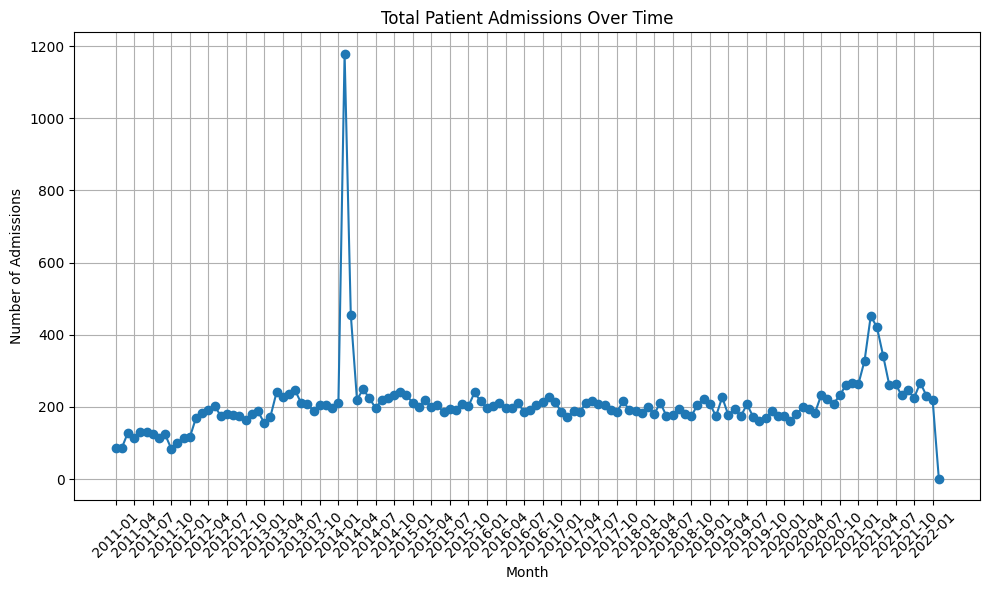

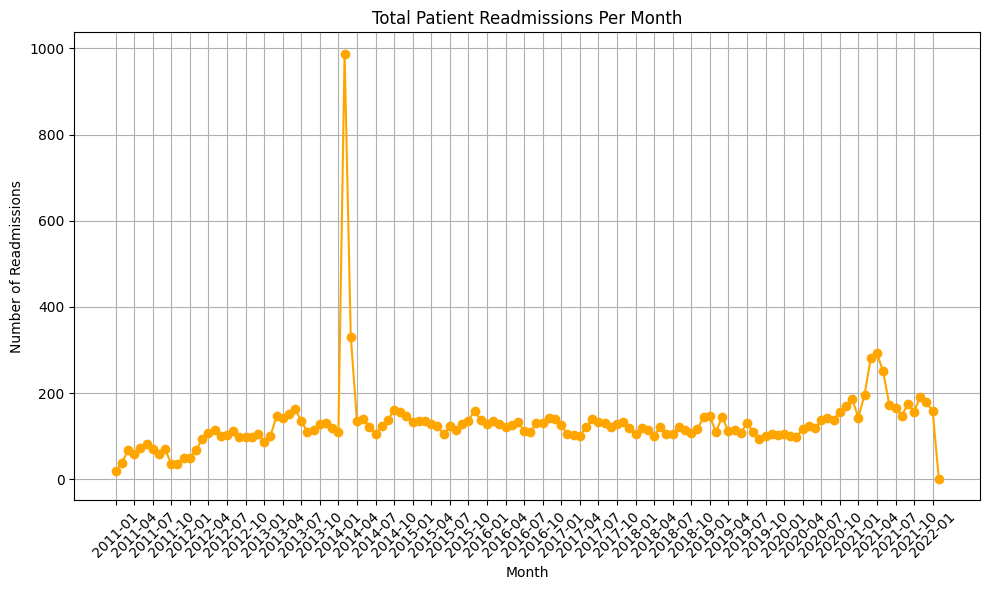

In [ ]:
# Plot total admissions by month
plt.figure(figsize=(10, 6))
plt.plot(admissions_over_time['MONTH'].astype(str), admissions_over_time['Total_Encounters'], marker='o')
plt.title('Total Patient Admissions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')

# Set xticks to every 3rd month
plt.xticks(ticks=admissions_over_time.index[::3], labels=admissions_over_time['MONTH'].astype(str)[::3], rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()

print("\n")

# Plot readmissions by month
plt.figure(figsize=(10, 6))
plt.plot(readmissions_per_month['MONTH'].astype(str), readmissions_per_month['Total Readmissions'], marker='o', color='orange')
plt.title('Total Patient Readmissions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Readmissions')
plt.xticks(ticks=readmissions_per_month.index[::3], labels=readmissions_per_month['MONTH'].astype(str)[::3], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Step 5: Let's plot the same graph by encounter type instead, to provide more granularity and detail to our visuals.**

<ipython-input-50-a562366a0126>:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  encounters['MONTH'] = encounters['START'].dt.to_period('M')


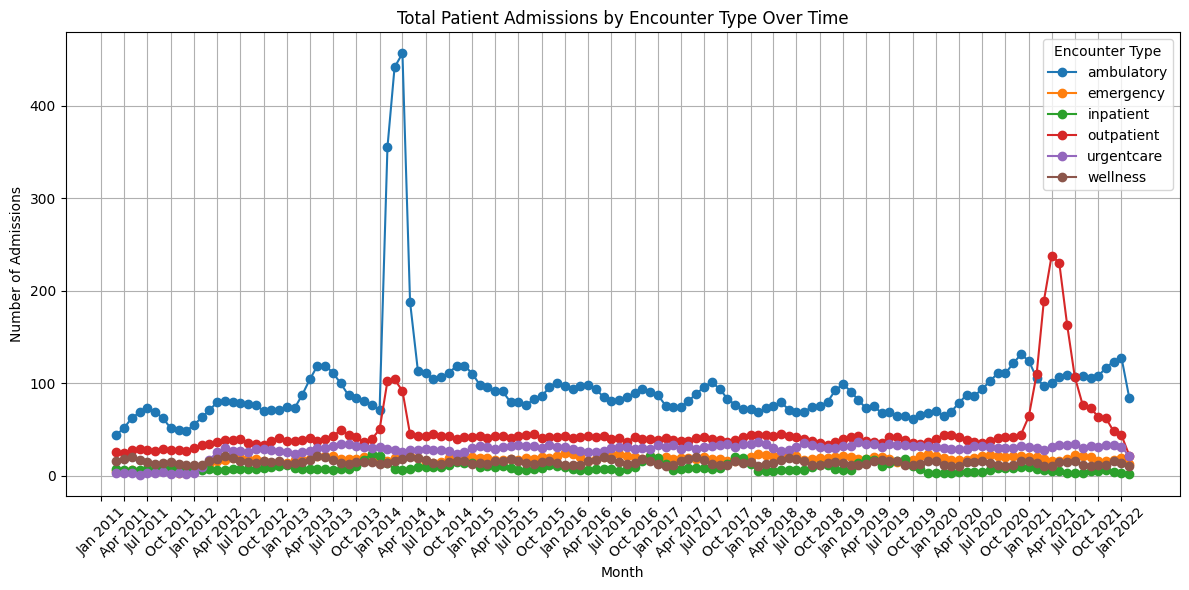

In [ ]:
# Ensure 'MONTH' and 'ENCOUNTERCLASS' columns exist
encounters['MONTH'] = encounters['START'].dt.to_period('M')

# Group by 'MONTH' and 'ENCOUNTERCLASS'
admissions_by_encounter_type = encounters.groupby(['MONTH', 'ENCOUNTERCLASS']).size().reset_index(name='Total Admissions')

# Convert 'MONTH' back to datetime for plotting
admissions_by_encounter_type['MONTH'] = admissions_by_encounter_type['MONTH'].dt.to_timestamp()

# Pivot the table for encounter type columns
pivot_data = admissions_by_encounter_type.pivot(index='MONTH', columns='ENCOUNTERCLASS', values='Total Admissions').fillna(0)

# Apply a rolling mean to smooth the trend
smoothed_pivot_data = pivot_data.rolling(window=3).mean()

# Plot the smoothed data
plt.figure(figsize=(12, 6))
for encounter_type in smoothed_pivot_data.columns:
    plt.plot(smoothed_pivot_data.index, smoothed_pivot_data[encounter_type], marker='o', label=encounter_type)

# Add titles and labels
plt.title('Total Patient Admissions by Encounter Type Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Admissions')
plt.xticks(ticks=smoothed_pivot_data.index[::3], labels=smoothed_pivot_data.index[::3].strftime('%b %Y'), rotation=45)

# Add a legend to differentiate encounter types
plt.legend(title='Encounter Type')
plt.grid(True)
plt.tight_layout()
plt.show()

# Question 2: How long are patients staying in the hospital, on average? <br>

Thought Process: Use the Encounters dataframe and calculate the duration (in days) using the Start / Stop columns, and then calculate the average length of each stay. We'll go one step further to determine the average length by encounter type and visualize the average length of stay by encounter type.

**Step 1: Calculate the average length of stay:**

Let's calculate the start / stop columns into seconds, then convert to __ h and __ min format, and then calculate the average length.

In [ ]:
# Convert 'START' and 'STOP' columns to datetime if not already
encounters['START'] = pd.to_datetime(encounters['START'], utc=True)
encounters['STOP'] = pd.to_datetime(encounters['STOP'], utc=True)

# Calculate duration in seconds
encounters['DURATION_SECONDS'] = (encounters['STOP'] - encounters['START']).dt.total_seconds()

# Convert duration to hours and minutes
encounters['DURATION_HOURS'] = (encounters['DURATION_SECONDS'] // 3600).astype(int)  # Total hours
encounters['DURATION_MINUTES'] = ((encounters['DURATION_SECONDS'] % 3600) // 60).astype(int)  # Remaining minutes

# Combine hours and minutes into a formatted string
encounters['DURATION_FORMATTED'] = encounters['DURATION_HOURS'].astype(str) + ' h ' + encounters['DURATION_MINUTES'].astype(str) + ' min'

# Display the DataFrame with the new column
print(encounters[['START', 'STOP', 'DURATION_FORMATTED']].head())

print("\n")

# Now, let's calculate the average duration in seconds
average_duration_seconds = encounters['DURATION_SECONDS'].mean()

# Convert the calculated average duration from seconds to ___ hours and ___ minutes format
average_duration_hours = int(average_duration_seconds // 3600)  # Total hours
average_duration_minutes = int((average_duration_seconds % 3600) // 60)  # Remaining minutes

# Print the average duration in "___ h ___ min" format
print(f"The average length of stay in the hospital is {average_duration_hours} h {average_duration_minutes} min.")

                         START                      STOP DURATION_FORMATTED
1292 2011-12-22 19:30:33+00:00 2011-12-22 20:30:33+00:00          1 h 0 min
1403 2012-01-19 19:30:33+00:00 2012-01-20 19:30:33+00:00         24 h 0 min
8398 2014-06-19 19:30:33+00:00 2014-06-20 19:30:33+00:00         24 h 0 min
9343 2014-10-30 19:30:33+00:00 2014-10-30 19:45:33+00:00         0 h 15 min
9579 2014-11-29 19:30:33+00:00 2014-11-29 19:45:33+00:00         0 h 15 min


The average length of stay in the hospital is 7 h 15 min.


**Step 2: Group the average length of stay by encounter type:**

Similar to that of Step 1, but instead, calculate the categorize the average length by encounter type.

In [ ]:
# Group by encounter type ('ENCOUNTERCLASS') and calculate the average duration in seconds for each group
average_duration_by_encounter_type = encounters.groupby('ENCOUNTERCLASS')['DURATION_SECONDS'].mean().reset_index()

# Convert the average duration to hours and minutes for each encounter type
average_duration_by_encounter_type['DURATION_HOURS'] = (average_duration_by_encounter_type['DURATION_SECONDS'] // 3600).astype(int)  # Total hours
average_duration_by_encounter_type['DURATION_MINUTES'] = ((average_duration_by_encounter_type['DURATION_SECONDS'] % 3600) // 60).astype(int)  # Remaining minutes

# Combine hours and minutes into a formatted string for each encounter type
average_duration_by_encounter_type['DURATION_FORMATTED'] = average_duration_by_encounter_type['DURATION_HOURS'].astype(str) + ' h ' + average_duration_by_encounter_type['DURATION_MINUTES'].astype(str) + ' min'

# Display the DataFrame with the encounter type and formatted duration
print("Average duration by encounter type: \n", average_duration_by_encounter_type[['ENCOUNTERCLASS', 'DURATION_FORMATTED']])

Average duration by encounter type: 
   ENCOUNTERCLASS DURATION_FORMATTED
0     ambulatory         9 h 28 min
1      emergency         1 h 32 min
2      inpatient        36 h 50 min
3     outpatient         5 h 52 min
4     urgentcare         0 h 15 min
5       wellness         0 h 15 min


**Step 3: Visualize the average length of stay by encounter type:**

Use the seaborn library to make a bar graph and visualize the average length of the hospital stat, by encounter type.

<ipython-input-53-c24985bbf6ee>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ENCOUNTERCLASS', y='TOTAL_MINUTES', data=average_duration_by_encounter_type, palette='viridis', order=average_duration_by_encounter_type['ENCOUNTERCLASS'])


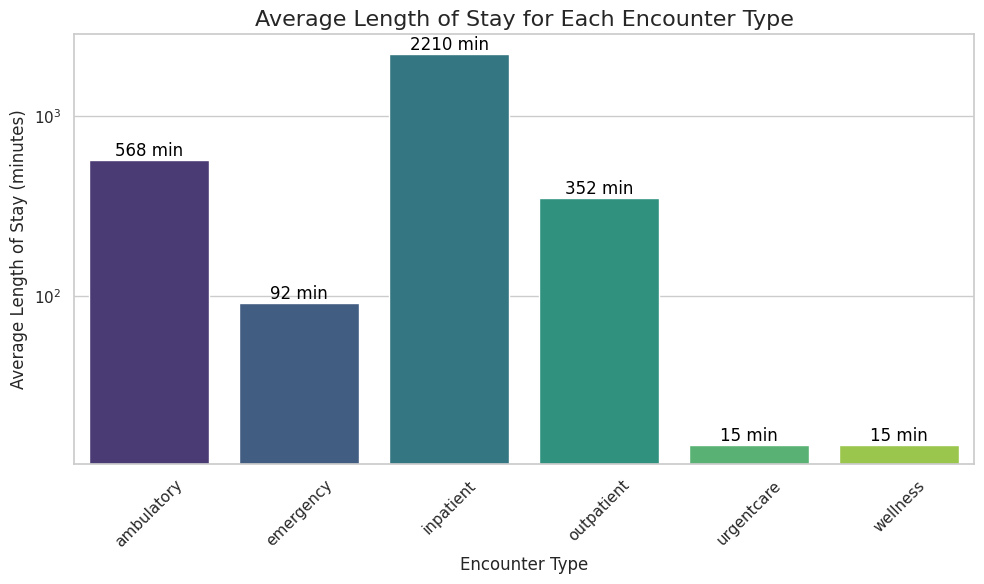

In [ ]:
# Calculate total duration in minutes if not already done
average_duration_by_encounter_type['TOTAL_MINUTES'] = (
    average_duration_by_encounter_type['DURATION_HOURS'] * 60 +
    average_duration_by_encounter_type['DURATION_MINUTES']
)

# Set the plot style
sns.set(style="whitegrid")

# Create a new figure for plotting
plt.figure(figsize=(10, 6))

# Use a logarithmic scale for the y-axis to improve visibility of smaller values
plt.yscale('log')

# Create the bar plot using total minutes, ensuring all categories are included
sns.barplot(x='ENCOUNTERCLASS', y='TOTAL_MINUTES', data=average_duration_by_encounter_type, palette='viridis', order=average_duration_by_encounter_type['ENCOUNTERCLASS'])

# Add labels and title
plt.title('Average Length of Stay for Each Encounter Type', fontsize=16)
plt.xlabel('Encounter Type', fontsize=12)
plt.ylabel('Average Length of Stay (minutes)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Optionally, add data labels on top of the bars
for index, row in average_duration_by_encounter_type.iterrows():
    plt.text(index, row['TOTAL_MINUTES'], f"{row['TOTAL_MINUTES']} min", color='black', ha="center", va="bottom")

# Show the plot
plt.tight_layout()
plt.show()

# Question 3: How much is the average cost per visit? <br>

Thought Process: Use the Encounters dataframe and work on two specific columns, namely 'Total Claim Cost' and 'Base Encounter Cost' and calculate averages using the two column types.

For the Base Encounter Cost approach, this gives me a straightforward measure of the average cost associated with each type of visit.

For the Total Claim Cost approach, this gives me a broader perspective on the overall costs incurred for each visit, including additional factors that may not be captured in the base encounter cost.

As an optional extra, let's also try to calculate both average cost types and compare them. This would allow me to see how much the costs vary depending on which column I use.

**Step 1: Calculate the average cost based on 'Base Encounter Cost' and 'Total Claim Cost' approaches:**

Use the two columns from the Encounters dataframe to compute the average, and then calculate the averages based on encounter type.

In [ ]:
# Calculate the average cost per visit based on base encounter cost
average_base_cost = encounters['BASE_ENCOUNTER_COST'].mean()

# Calculate the average cost per visit based on total claim cost
average_total_cost = encounters['TOTAL_CLAIM_COST'].mean()

# Print the results
print(f"The average base cost per visit is: ${average_base_cost:.2f}")
print(f"The average total claim cost per visit is: ${average_total_cost:.2f}")

print("\n")

# Calculate average costs by encounter type
average_cost_by_encounter_type = encounters.groupby('ENCOUNTERCLASS')[['BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST']].mean().round(2).reset_index()

# Display the average costs
print("Average costs by encounter type: \n", average_cost_by_encounter_type)

The average base cost per visit is: $116.18
The average total claim cost per visit is: $3639.68


Average costs by encounter type: 
   ENCOUNTERCLASS  BASE_ENCOUNTER_COST  TOTAL_CLAIM_COST
0     ambulatory               105.73           2894.11
1      emergency               145.25           4629.65
2      inpatient               113.67           7761.35
3     outpatient               105.04           2237.30
4     urgentcare               142.58           6369.16
5       wellness               136.80           4260.71


**Step 2: Visualize the average costs by encounter type:**

Use the Seaborn library to visually display the average costs by encounter type.

<ipython-input-55-db5235a13b3a>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot=heatmap_data.applymap(lambda x: f"${x:.2f}"),  # Format annotations with $ symbol


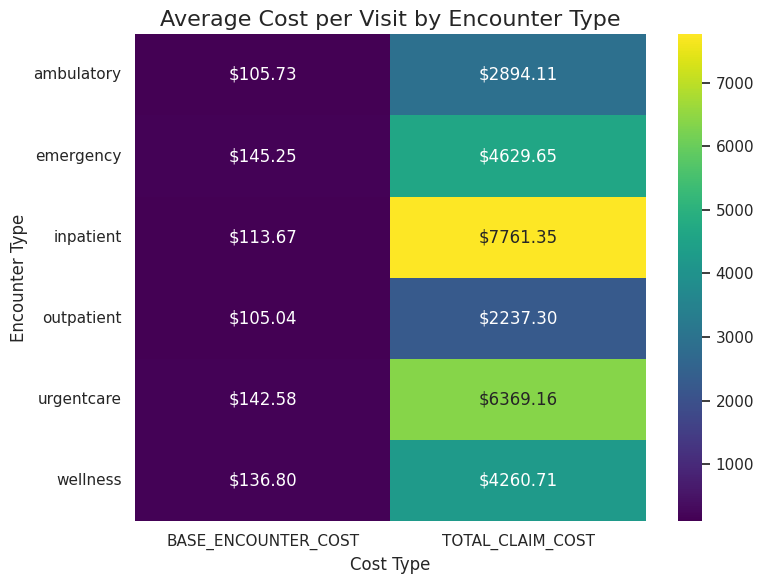

In [ ]:
# Set the plot style
sns.set(style="whitegrid")

# Create a new figure for plotting
plt.figure(figsize=(8, 6))

# Reshape the DataFrame for the heatmap
heatmap_data = average_cost_by_encounter_type.set_index('ENCOUNTERCLASS')

# Create the heatmap with dollar formatting for annotations
sns.heatmap(
    heatmap_data,
    annot=heatmap_data.applymap(lambda x: f"${x:.2f}"),  # Format annotations with $ symbol
    fmt="",  # No formatting for the cells
    cmap="viridis"
)

# Add labels and title
plt.title('Average Cost per Visit by Encounter Type', fontsize=16)
plt.xlabel('Cost Type', fontsize=12)
plt.ylabel('Encounter Type', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Question 4: How many procedures are covered by insurance?

Thought Process: First, I will need to link the Procedures table and the Encounters table using the Encounter as the foreign key. The Encounters table contains information about Payer_Coverage, which can help determine if a procedure was covered by insurance.

**Step 1: Join the Tables - Merge the Procedures and Encounters DataFrames using the common Encounter key:**

Encounters table has the Id column and Procedures table has the Encounter column, so we'll use that information to perform our join.

In [ ]:
# Merge Procedures and Encounters DataFrames
merged_df = pd.merge(procedures, encounters, left_on='ENCOUNTER', right_on='Id', suffixes=('_procedure', '_encounter'))

# Debug: Check the columns in the merged DataFrame
print("Columns in the merged DataFrame: \n", merged_df.columns)

# Check the unique values in the PAYER_COVERAGE column
# Note: From the data dictionary, PAYER_COVERAGE denotes the cost covered by insurance,
# so a reasonable assumption that can be made is if the value in PAYER_COVERAGE is 0, then
# that means the procedure is NOT covered by the column
print("Unique values in PAYER_COVERAGE column: ", merged_df['PAYER_COVERAGE'].unique())

# Filter for the rows where Payer_Coverage > 0
covered_procedures = merged_df[merged_df['PAYER_COVERAGE'] > 0]

# Count the number of unique procedures covered by insurance, and print the result
covered_procedures_count = covered_procedures['CODE_procedure'].nunique()
print(f"Number of procedures covered by insurance: {covered_procedures_count}")

Columns in the merged DataFrame: 
 Index(['START_procedure', 'STOP_procedure', 'DURATION (mins)_procedure',
       'PATIENT_procedure', 'ENCOUNTER', 'CODE_procedure',
       'DESCRIPTION_procedure', 'BASE_COST', 'REASONCODE_procedure',
       'REASONDESCRIPTION_procedure', 'Id', 'START_encounter',
       'STOP_encounter', 'DURATION (mins)_encounter', 'PATIENT_encounter',
       'ORGANIZATION', 'PAYER', 'ENCOUNTERCLASS', 'CODE_encounter',
       'DESCRIPTION_encounter', 'BASE_ENCOUNTER_COST', 'TOTAL_CLAIM_COST',
       'PAYER_COVERAGE', 'REASONCODE_encounter', 'REASONDESCRIPTION_encounter',
       'MONTH', 'TIME_DIFF', 'READMISSION', 'FIRST_ADMISSION',
       'DURATION_SECONDS', 'DURATION_HOURS', 'DURATION_MINUTES',
       'DURATION_FORMATTED'],
      dtype='object')
Unique values in PAYER_COVERAGE column:  [    0.   11205.43  7872.94 ... 20235.27   708.42  8438.67]
Number of procedures covered by insurance: 138


**Step 2: Plot a visual showing the number of procedures covered by insurance based on grouping by encounter type:**

This involves grouping the merged dataframe by encounter type and counting the number of unique procedures per encounter type.

<ipython-input-57-a56abd5c4c28>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(data=procedure_counts_by_class, x='Encounter Class', y='Number of Covered Procedures', palette='viridis')


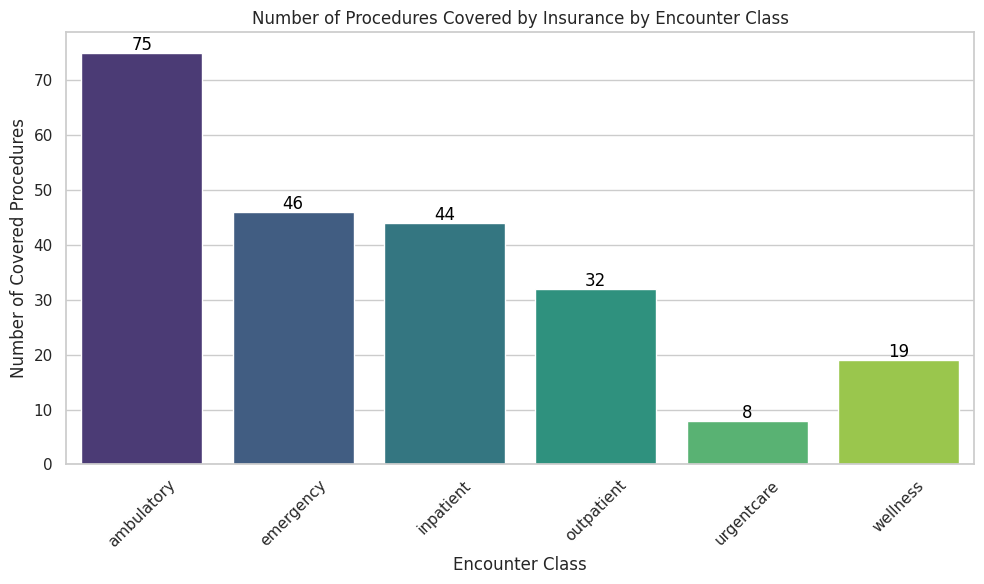

In [ ]:
# Group by EncounterClass and count unique procedure codes
procedure_counts_by_class = covered_procedures.groupby('ENCOUNTERCLASS')['CODE_procedure'].nunique().reset_index()

# Rename columns for clarity
procedure_counts_by_class.columns = ['Encounter Class', 'Number of Covered Procedures']

# Plot the result using seaborn for a barplot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=procedure_counts_by_class, x='Encounter Class', y='Number of Covered Procedures', palette='viridis')

# Add labels and title
plt.xlabel('Encounter Class')
plt.ylabel('Number of Covered Procedures')
plt.title('Number of Procedures Covered by Insurance by Encounter Class')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Add labels on each bar
for index, row in procedure_counts_by_class.iterrows():
    bar_plot.text(index, row['Number of Covered Procedures'] + 0.5,  # Positioning the label
                  str(row['Number of Covered Procedures']),
                  color='black', ha="center")

# Show the plot
plt.tight_layout()
plt.show()

**Step 3: Let's also now plot the number of procedures covered by each insurance provider, grouping by both encounter type and insurance provider.**

First, merge the Payers table into the merged_df. Then, group by the insurance provider (payer) and encounter type. Finally, plot the number of covered procedures grouped by both the payer and the encounter class.

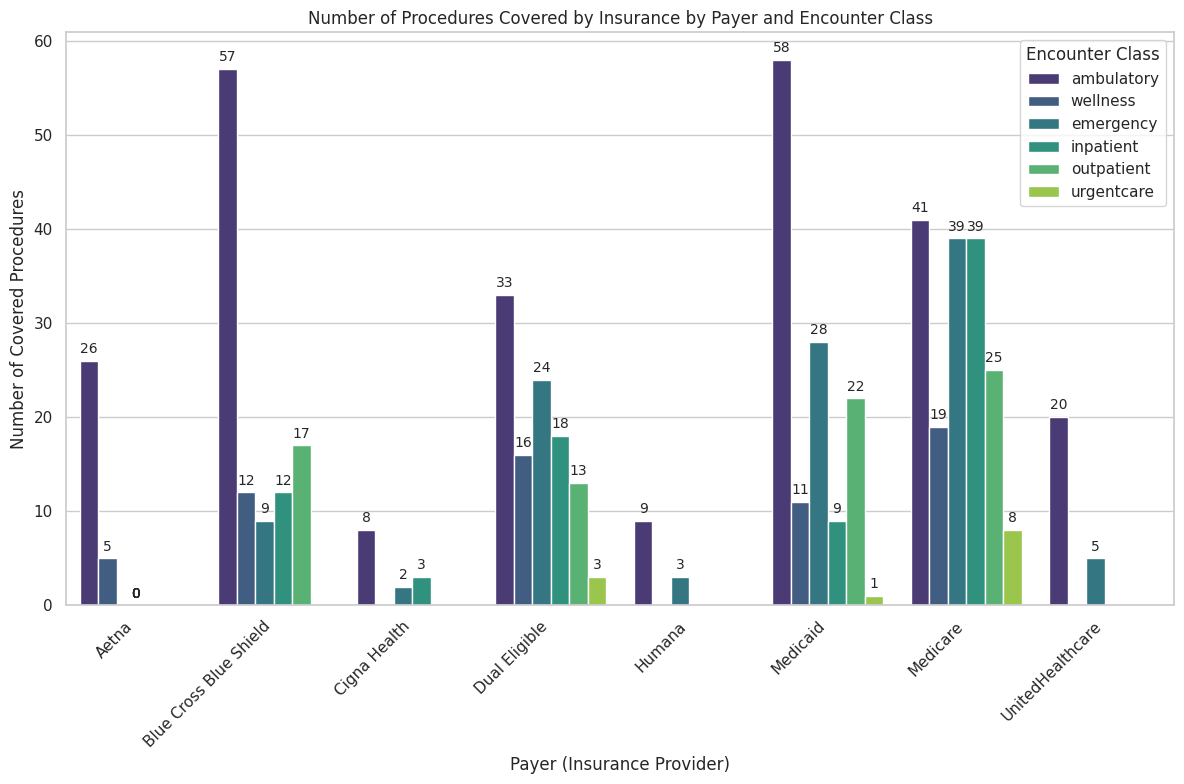

In [ ]:
# Merge Payers with the merged_df
merged_with_payers = pd.merge(merged_df, payers, left_on='PAYER', right_on='Id', suffixes=('', '_payer'))

# Filter for procedures where insurance coverage is greater than 0
covered_procedures = merged_with_payers[merged_with_payers['PAYER_COVERAGE'] > 0]

# Group by insurance provider (Payer) and EncounterClass, then count unique procedure codes
procedure_counts_by_payer_and_class = covered_procedures.groupby(['NAME', 'ENCOUNTERCLASS'])['CODE_procedure'].nunique().reset_index()

# Rename columns for clarity
procedure_counts_by_payer_and_class.columns = ['Payer', 'Encounter Class', 'Number of Covered Procedures']

# Plot the result using seaborn for a barplot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(data=procedure_counts_by_payer_and_class, x='Payer', y='Number of Covered Procedures', hue='Encounter Class', palette='viridis')

# Add labels and title
plt.xlabel('Payer (Insurance Provider)')
plt.ylabel('Number of Covered Procedures')
plt.title('Number of Procedures Covered by Insurance by Payer and Encounter Class')
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability

# Add numeric labels for each bar
for bar in bar_plot.patches:
    height = bar.get_height()
    if not pd.isna(height):  # Avoid placing labels on missing bars
        bar_plot.text(
            bar.get_x() + bar.get_width() / 2,  # Horizontal position
            height + 0.5,  # Vertical position, slightly above the bar
            f'{int(height)}',  # Format the label as an integer
            ha='center',  # Center-align text horizontally
            va='bottom',  # Bottom-align text vertically
            fontsize=10  # Adjust font size
        )

# Show the plot
plt.tight_layout()
plt.show()